In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

Data importing and preprocessing

Batsmen + All rounder(bat stats)

In [ ]:
csk_batsmen = pd.ExcelFile('CSK_BATSMEN.xlsx')
csk_batsmen_list=csk_batsmen.sheet_names
csk_batsmen_dict={}
for i in range(len(csk_batsmen_list)):
    csk_batsmen_dict[csk_batsmen_list[i]]=csk_batsmen.parse(csk_batsmen_list[i])

rcb_batsmen = pd.ExcelFile('RCB_BATSMEN.xlsx')
rcb_batsmen_list=rcb_batsmen.sheet_names
rcb_batsmen_dict={}
for i in range(len(rcb_batsmen_list)):
    rcb_batsmen_dict[rcb_batsmen_list[i]]=rcb_batsmen.parse(rcb_batsmen_list[i])


In [ ]:
csk_bat_all = pd.ExcelFile('CSK_ALLROUNDERS.xlsx')
csk_bat_all_list=csk_bat_all.sheet_names
csk_allrounders=[]
for i in range(len(csk_bat_all_list)):
    if ' a' in csk_bat_all_list[i]:
      csk_allrounders.append(csk_bat_all_list[i].replace(' a',''))
      csk_batsmen_dict[csk_bat_all_list[i].replace(' a','')]=csk_bat_all.parse(csk_bat_all_list[i])

rcb_bat_all = pd.ExcelFile('RCB_ALLROUNDERS.xlsx')
rcb_bat_all_list=rcb_bat_all.sheet_names
rcb_allrounders=[]
for i in range(len(rcb_bat_all_list)):
    if ' a' in rcb_bat_all_list[i]:
      rcb_allrounders.append(rcb_bat_all_list[i].replace(' a',''))
      rcb_batsmen_dict[rcb_bat_all_list[i].replace(' a','')]=rcb_bat_all.parse(rcb_bat_all_list[i])

In [ ]:
csk_batsmen_list=list(csk_batsmen_dict.keys())
rcb_batsmen_list=list(rcb_batsmen_dict.keys())

In [ ]:
for i in range(len(csk_batsmen_list)):
    print(csk_batsmen_list[i])
    print(csk_batsmen_dict[csk_batsmen_list[i]].info())
    print(csk_batsmen_dict[csk_batsmen_list[i]].isnull().sum())
    print("----------------------------------------------------------------------------------------")

MS Dhoni
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Match          250 non-null    object 
 1   Innings        218 non-null    float64
 2   Date           250 non-null    object 
 3   M/Inns         250 non-null    object 
 4   Posn           250 non-null    object 
 5   Versus         250 non-null    object 
 6   Ground         250 non-null    object 
 7   How Dismissed  250 non-null    object 
 8   Runs           250 non-null    object 
 9   B/F            250 non-null    object 
 10  S/R            250 non-null    object 
 11  Unnamed: 11    0 non-null      float64
 12  Aggr           250 non-null    int64  
 13  Avg            250 non-null    float64
 14  S/RC           250 non-null    float64
dtypes: float64(4), int64(1), object(10)
memory usage: 29.4+ KB
None
Match              0
Innings           32
Date               0
M/Inns

In [ ]:
def split_dismissed(x):
    #print(x)
    bowler='NA'
    catcher='NA'
    check=0
    if x=='run out':
      catcher='run out'
      return pd.Series([bowler,catcher])
    if 'c & b ' in x:
      parts=x.split(' b ')
      check=len(parts)
      bowler=parts[-1].strip().lower()
      bowler=catcher=re.sub('[^a-zA-Z ]', ' ', bowler)
      return pd.Series([bowler,catcher])
    if ' b ' in x:
      parts=x.split(' b ')
      check=len(parts)
      bowler=parts[-1].strip().lower()
      bowler=re.sub('[^a-zA-Z ]', ' ', bowler)
    if 'c ' in x:
      catcher = parts[0].replace('c ', '').strip().lower()
      catcher=re.sub('[^a-zA-Z]', ' ', catcher)
    elif ' b ' in x and check!=1:
      parts=x.split(' b ')
      catcher=parts[0].strip().lower()
      catcher=re.sub('[^a-zA-Z ]', ' ', catcher)
    elif ' b ' in x and check==1:
      catcher='bowled'

    if bowler=='NA' and catcher=='NA':
      bowler=catcher='not out'
    return pd.Series([bowler,catcher])


In [ ]:
def runs_correct(x):
    if('*' in x):
        return float(x.split('*')[0])
    else:
        return float(x)

In [ ]:
def add_tag(x):
  if x in csk_allrounders or x in rcb_allrounders:
    return 'all'
  elif x in csk_batsmen_list or x in rcb_batsmen_list:
    return 'bat'
  else:
    return 'bowl'


In [ ]:
for i in range(len(csk_batsmen_list)):
    #print(csk_batsmen_list[i])
    #print(csk_batsmen_dict[csk_batsmen_list[i]].columns)
    csk_batsmen_dict[csk_batsmen_list[i]].drop(['Unnamed: 11'],inplace=True,axis=1)  #Deleting an empty column in between
    csk_batsmen_dict[csk_batsmen_list[i]]=csk_batsmen_dict[csk_batsmen_list[i]][csk_batsmen_dict[csk_batsmen_list[i]]['How Dismissed'].apply(lambda x:x!='did not bat')]
    csk_batsmen_dict[csk_batsmen_list[i]].reset_index(drop=True, inplace=True)
    # Removing rows where there is 'did not bat' remark as it does not help with the data
    csk_batsmen_dict[csk_batsmen_list[i]]['Innings']=csk_batsmen_dict[csk_batsmen_list[i]]['Innings'].astype(int)
    csk_batsmen_dict[csk_batsmen_list[i]]['Date']=pd.to_datetime(csk_batsmen_dict[csk_batsmen_list[i]]['Date'],dayfirst=True)
    csk_batsmen_dict[csk_batsmen_list[i]]['M/Inns']=csk_batsmen_dict[csk_batsmen_list[i]]['M/Inns'].str.extract('(\d+)', expand=False).astype(int)
    csk_batsmen_dict[csk_batsmen_list[i]]['M/Inns']=csk_batsmen_dict[csk_batsmen_list[i]]['M/Inns'].astype(int)
    csk_batsmen_dict[csk_batsmen_list[i]]['Posn']=csk_batsmen_dict[csk_batsmen_list[i]]['Posn'].astype(int)
    csk_batsmen_dict[csk_batsmen_list[i]]['Not out']=csk_batsmen_dict[csk_batsmen_list[i]]['Runs'].apply(lambda x: 1 if str(x).endswith('*') else 0)
    csk_batsmen_dict[csk_batsmen_list[i]]['Runs']=csk_batsmen_dict[csk_batsmen_list[i]]['Runs'].apply(lambda x :runs_correct(str(x)))
    csk_batsmen_dict[csk_batsmen_list[i]]['S/R'] = csk_batsmen_dict[csk_batsmen_list[i]]['S/R'].astype(str)
    csk_batsmen_dict[csk_batsmen_list[i]]['S/R']=csk_batsmen_dict[csk_batsmen_list[i]]['S/R'].str.replace('-','0')
    csk_batsmen_dict[csk_batsmen_list[i]][['Runs','B/F','S/R','Aggr','Avg','S/RC']]=csk_batsmen_dict[csk_batsmen_list[i]][['Runs','B/F','S/R','Aggr','Avg','S/RC']].astype(float)
    csk_batsmen_dict[csk_batsmen_list[i]][['bowler','catcher']]=csk_batsmen_dict[csk_batsmen_list[i]]['How Dismissed'].apply(split_dismissed)
    csk_batsmen_dict[csk_batsmen_list[i]].drop(['How Dismissed'],inplace=True,axis=1)
    csk_batsmen_dict[csk_batsmen_list[i]]['Avg']=csk_batsmen_dict[csk_batsmen_list[i]]['Avg'].fillna(0)
    csk_batsmen_dict[csk_batsmen_list[i]].drop(['Aggr'],inplace=True,axis=1)
    csk_batsmen_dict[csk_batsmen_list[i]]['Player']=csk_batsmen_list[i]
    csk_batsmen_dict[csk_batsmen_list[i]]['Tag']=csk_batsmen_dict[csk_batsmen_list[i]]['Player'].apply(add_tag)
csk_batsmen_dict['Mitchell Santner'].head(50)

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,Runs,B/F,S/R,Avg,S/RC,Not out,bowler,catcher,Player,Tag
0,2,1,2019-11-04,2,8,Rajasthan Royals,Sawai Mansingh Stadium,10.0,3.0,333.33,0.00,333.33,1,not out,not out,Mitchell Santner,all
1,4,2,2019-04-26,2,8,Mumbai Indians,MA Chidambaram Stadium,22.0,20.0,110.00,32.00,139.13,0,s l malinga,k a pollard,Mitchell Santner,all
2,8,3,2022-04-21,2,3,Mumbai Indians,Dr DY Patil Sports Academy,11.0,9.0,122.22,21.50,134.38,0,d r sams,j d unadkat,Mitchell Santner,all
3,9,4,2022-04-25,2,3,Punjab Kings,Wankhede Stadium,9.0,15.0,60.00,17.33,110.64,0,not out,not out,Mitchell Santner,all
4,11,5,2022-05-15,1,7,Gujarat Titans,Wankhede Stadium,1.0,1.0,100.00,17.67,110.42,1,not out,not out,Mitchell Santner,all
5,12,6,2022-05-20,1,7,Rajasthan Royals,Brabourne Stadium,1.0,2.0,50.00,18.00,108.00,1,not out,not out,Mitchell Santner,all
6,13,7,2023-03-31,1,9,Gujarat Titans,Narendra Modi Stadium,1.0,3.0,33.33,18.33,103.77,1,not out,not out,Mitchell Santner,all
7,14,8,2023-03-04,1,9,Lucknow Super Giants,MA Chidambaram Stadium,1.0,1.0,100.00,18.67,103.70,1,not out,not out,Mitchell Santner,all


In [ ]:
for i in range(len(csk_batsmen_list)):
    print(csk_batsmen_list[i])
    print(csk_batsmen_dict[csk_batsmen_list[i]].info())
    print(csk_batsmen_dict[csk_batsmen_list[i]].isnull().sum())
    print("----------------------------------------------------------------------------------------")

MS Dhoni
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Match    218 non-null    object        
 1   Innings  218 non-null    int64         
 2   Date     218 non-null    datetime64[ns]
 3   M/Inns   218 non-null    int64         
 4   Posn     218 non-null    int64         
 5   Versus   218 non-null    object        
 6   Ground   218 non-null    object        
 7   Runs     218 non-null    float64       
 8   B/F      218 non-null    float64       
 9   S/R      218 non-null    float64       
 10  Avg      218 non-null    float64       
 11  S/RC     218 non-null    float64       
 12  Not out  218 non-null    int64         
 13  bowler   218 non-null    object        
 14  catcher  218 non-null    object        
 15  Player   218 non-null    object        
 16  Tag      218 non-null    object        
dtypes: datetime64[ns](1), floa

In [ ]:
for i in range(len(rcb_batsmen_list)):
    print(rcb_batsmen_list[i])
    print(rcb_batsmen_dict[rcb_batsmen_list[i]].info())
    print(rcb_batsmen_dict[rcb_batsmen_list[i]].isnull().sum())
    print("----------------------------------------------------------------------------------------")

Faf Duplesis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Match          130 non-null    object 
 1   Innings        123 non-null    float64
 2   Date           130 non-null    object 
 3   M/Inns         130 non-null    object 
 4   Posn           130 non-null    object 
 5   Versus         130 non-null    object 
 6   Ground         130 non-null    object 
 7   How Dismissed  130 non-null    object 
 8   Runs           130 non-null    object 
 9   B/F            130 non-null    object 
 10  S/R            130 non-null    object 
 11  Unnamed: 11    0 non-null      float64
 12  Aggr           130 non-null    int64  
 13  Avg            130 non-null    float64
 14  S/RC           130 non-null    float64
dtypes: float64(4), int64(1), object(10)
memory usage: 15.4+ KB
None
Match              0
Innings            7
Date               0
M/

In [ ]:
for i in range(len(rcb_batsmen_list)):
    #print(rcb_batsmen_list[i])
    #print(csk_batsmen_dict[rcb_batsmen_list[i]].columns)
    rcb_batsmen_dict[rcb_batsmen_list[i]].drop(['Unnamed: 11'],inplace=True,axis=1)  #Deleting an empty column in between
    rcb_batsmen_dict[rcb_batsmen_list[i]]=rcb_batsmen_dict[rcb_batsmen_list[i]][rcb_batsmen_dict[rcb_batsmen_list[i]]['How Dismissed'].apply(lambda x:x!='did not bat')]
    rcb_batsmen_dict[rcb_batsmen_list[i]].reset_index(drop=True, inplace=True)
    # Removing rows where there is 'did not bat' remark as it does not help with the data
    rcb_batsmen_dict[rcb_batsmen_list[i]]['Innings']=rcb_batsmen_dict[rcb_batsmen_list[i]]['Innings'].astype(int)
    rcb_batsmen_dict[rcb_batsmen_list[i]]['Date']=pd.to_datetime(rcb_batsmen_dict[rcb_batsmen_list[i]]['Date'],dayfirst=True)
    rcb_batsmen_dict[rcb_batsmen_list[i]]['M/Inns']=rcb_batsmen_dict[rcb_batsmen_list[i]]['M/Inns'].str.extract('(\d+)', expand=False).astype(int)
    rcb_batsmen_dict[rcb_batsmen_list[i]]['M/Inns']=rcb_batsmen_dict[rcb_batsmen_list[i]]['M/Inns'].astype(int)
    rcb_batsmen_dict[rcb_batsmen_list[i]]['Posn']=rcb_batsmen_dict[rcb_batsmen_list[i]]['Posn'].astype(int)
    rcb_batsmen_dict[rcb_batsmen_list[i]]['Not out']=rcb_batsmen_dict[rcb_batsmen_list[i]]['Runs'].apply(lambda x: 1 if str(x).endswith('*') else 0)
    rcb_batsmen_dict[rcb_batsmen_list[i]]['Runs']=rcb_batsmen_dict[rcb_batsmen_list[i]]['Runs'].apply(lambda x :runs_correct(str(x)))
    rcb_batsmen_dict[rcb_batsmen_list[i]]['S/R'] = rcb_batsmen_dict[rcb_batsmen_list[i]]['S/R'].astype(str)
    rcb_batsmen_dict[rcb_batsmen_list[i]]['S/R']=rcb_batsmen_dict[rcb_batsmen_list[i]]['S/R'].str.replace('-','0')
    rcb_batsmen_dict[rcb_batsmen_list[i]][['Runs','B/F','S/R','Aggr','Avg','S/RC']]=rcb_batsmen_dict[rcb_batsmen_list[i]][['Runs','B/F','S/R','Aggr','Avg','S/RC']].astype(float)
    rcb_batsmen_dict[rcb_batsmen_list[i]][['bowler','catcher']]=rcb_batsmen_dict[rcb_batsmen_list[i]]['How Dismissed'].apply(split_dismissed)
    rcb_batsmen_dict[rcb_batsmen_list[i]].drop(['How Dismissed'],inplace=True,axis=1)
    rcb_batsmen_dict[rcb_batsmen_list[i]]['Avg']=rcb_batsmen_dict[rcb_batsmen_list[i]]['Avg'].fillna(0)
    rcb_batsmen_dict[rcb_batsmen_list[i]].drop(['Aggr'],inplace=True,axis=1)
    rcb_batsmen_dict[rcb_batsmen_list[i]]['Player']=rcb_batsmen_list[i]
    rcb_batsmen_dict[rcb_batsmen_list[i]]['Tag']=rcb_batsmen_dict[rcb_batsmen_list[i]]['Player'].apply(add_tag)

rcb_batsmen_dict['Virat Kohli'].head(50)

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,Runs,B/F,S/R,Avg,S/RC,Not out,bowler,catcher,Player,Tag
0,1,1,2008-04-18,2,3,Kolkata Knight Riders,M Chinnaswamy Stadium,1.0,5.0,20.00,1.00,20.00,0,not out,not out,Virat Kohli,bat
1,2,2,2008-04-20,2,5,Mumbai Indians,Wankhede Stadium,23.0,14.0,164.29,12.00,126.32,0,a nehra,l ronchi,Virat Kohli,bat
2,3,3,2008-04-26,1,5,Rajasthan Royals,M Chinnaswamy Stadium,13.0,14.0,92.86,12.33,112.12,0,m m patel,m rawat,Virat Kohli,bat
3,4,4,2008-04-28,2,6,Chennai Super Kings,M Chinnaswamy Stadium,12.0,7.0,171.43,12.25,122.50,0,not out,not out,Virat Kohli,bat
4,5,5,2008-04-30,2,7,Delhi Capitals,Arun Jaitley Stadium,1.0,1.0,100.00,12.50,121.95,1,not out,not out,Virat Kohli,bat
5,6,6,2008-03-05,1,3,Deccan Chargers,M Chinnaswamy Stadium,38.0,29.0,131.03,17.60,125.71,0,r p singh,s b bangar,Virat Kohli,bat
6,7,7,2008-05-05,1,2,Punjab Kings,M Chinnaswamy Stadium,34.0,36.0,94.44,20.33,115.09,0,i k pathan,s sreesanth,Virat Kohli,bat
7,9,8,2008-12-05,1,2,Punjab Kings,Punjab Cricket Association IS Bindra Stadium,21.0,22.0,95.45,20.43,111.72,0,not out,not out,Virat Kohli,bat
8,10,9,2008-05-17,2,2,Rajasthan Royals,Sawai Mansingh Stadium,3.0,7.0,42.86,18.25,108.15,0,not out,not out,Virat Kohli,bat
9,11,10,2008-05-21,1,3,Chennai Super Kings,MA Chidambaram Stadium,10.0,16.0,62.50,17.33,103.31,0,m muralitharan,j a morkel,Virat Kohli,bat


In [ ]:
for i in range(len(rcb_batsmen_list)):
    print(rcb_batsmen_list[i])
    print(rcb_batsmen_dict[rcb_batsmen_list[i]].info())
    print(rcb_batsmen_dict[rcb_batsmen_list[i]].isnull().sum())
    print("----------------------------------------------------------------------------------------")

Faf Duplesis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Match    123 non-null    object        
 1   Innings  123 non-null    int64         
 2   Date     123 non-null    datetime64[ns]
 3   M/Inns   123 non-null    int64         
 4   Posn     123 non-null    int64         
 5   Versus   123 non-null    object        
 6   Ground   123 non-null    object        
 7   Runs     123 non-null    float64       
 8   B/F      123 non-null    float64       
 9   S/R      123 non-null    float64       
 10  Avg      123 non-null    float64       
 11  S/RC     123 non-null    float64       
 12  Not out  123 non-null    int64         
 13  bowler   123 non-null    object        
 14  catcher  123 non-null    object        
 15  Player   123 non-null    object        
 16  Tag      123 non-null    object        
dtypes: datetime64[ns](1), 

BOWLERS

In [ ]:
csk_bowlers = pd.ExcelFile('CSK_BOWLERS.xlsx')
csk_bowlers_list=csk_bowlers.sheet_names
csk_bowlers_dict={}
for i in range(len(csk_bowlers_list)):
    csk_bowlers_dict[csk_bowlers_list[i]]=csk_bowlers.parse(csk_bowlers_list[i])

rcb_bowlers = pd.ExcelFile('RCB_BOWLERS.xlsx')
rcb_bowlers_list=rcb_bowlers.sheet_names
rcb_bowlers_dict={}
for i in range(len(rcb_bowlers_list)):
    rcb_bowlers_dict[rcb_bowlers_list[i]]=rcb_bowlers.parse(rcb_bowlers_list[i])

In [ ]:
csk_bowler_all = pd.ExcelFile('CSK_ALLROUNDERS.xlsx')
csk_bowler_all_list=csk_bowler_all.sheet_names
for i in range(len(csk_bat_all_list)):
    if ' b' in csk_bowler_all_list[i]:
      csk_bowlers_dict[csk_bowler_all_list[i].replace(' b','')]=csk_bowler_all.parse(csk_bat_all_list[i])

rcb_bowler_all = pd.ExcelFile('RCB_ALLROUNDERS.xlsx')
rcb_bowler_all_list=rcb_bowler_all.sheet_names
for i in range(len(rcb_bowler_all_list)):
    if ' b' in rcb_bowler_all_list[i]:
      rcb_bowlers_dict[rcb_bowler_all_list[i].replace(' b','')]=rcb_bowler_all.parse(rcb_bowler_all_list[i])

In [ ]:
csk_bowlers_list=list(csk_bowlers_dict.keys())
rcb_bowlers_list=list(rcb_bowlers_dict.keys())

In [ ]:
for i in range(len(csk_bowlers_list)):
    print(csk_bowlers_list[i])
    print(csk_bowlers_dict[csk_bowlers_list[i]].info())
    print(csk_bowlers_dict[csk_bowlers_list[i]].isnull().sum())
    print("----------------------------------------------------------------------------------------")

Rajvardhan Hangargekar
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Match              2 non-null      float64
 1   Date               2 non-null      object 
 2   M/Inns             2 non-null      object 
 3   Versus             2 non-null      object 
 4   Ground             2 non-null      object 
 5   Batsman Dismissed  3 non-null      object 
 6   Overs              2 non-null      float64
 7   Wickets            2 non-null      object 
 8   Unnamed: 8         0 non-null      float64
 9   S/R                2 non-null      float64
 10  E/R                2 non-null      float64
 11  Wkts               4 non-null      int64  
 12  Avg                2 non-null      float64
dtypes: float64(6), int64(1), object(6)
memory usage: 544.0+ bytes
None
Match                2
Date                 2
M/Inns               2
Versus         

In [ ]:
csk_bowlers_dict['Moeen Ali'].columns

Index(['Match', 'Date', 'M/Inns', 'Versus', 'Ground', 'Batsman Dismissed',
       'Overs', 'Wickets', 'Unnamed: 8', 'S/R', 'E/R', 'Wkts', 'Avg'],
      dtype='object')

In [ ]:
def consolidate_dismissals(data):
    consolidated_data = []
    for i, row in data.iterrows():
        if not pd.isna(row['Match']):
            match_info = row.to_dict()
            match_info['Batsmen Dismissed'] = []
            if not pd.isna(row['Batsman Dismissed']):
                match_info['Batsmen Dismissed'].append(row['Batsman Dismissed'])
            consolidated_data.append(match_info)
        elif not pd.isna(row['Batsman Dismissed']):
            consolidated_data[-1]['Batsmen Dismissed'].append(row['Batsman Dismissed'])
    consolidated_df = pd.DataFrame(consolidated_data)

    def extract_dismissal_info(dismissals):
        methods = []
        cleaned_dismissals = []
        if len(dismissals)==0:
            return 'NA','NA'
        for dismissal in dismissals:
            if 'c ' in dismissal:
                method = 'caught'
                cleaned_dismissal = re.sub(r'c .*?\b b ', '', dismissal)
                cleaned_dismissal = re.sub(r'c .*?\b', '', cleaned_dismissal)
            elif 'lbw' in dismissal:
                method = 'lbw'
                cleaned_dismissal = dismissal.split(' lbw ')[0]
            elif 'b' in dismissal:
                method = 'bowled'
                cleaned_dismissal = dismissal.split(' b ')[0]
            else:
                method = 'other'
                cleaned_dismissal = dismissal
            methods.append(method)
            cleaned_dismissals.append(cleaned_dismissal.strip())
        return ', '.join(cleaned_dismissals), ', '.join(methods)

    consolidated_df[['Cleaned Batsmen Dismissed', 'Dismissal Method']] = consolidated_df['Batsmen Dismissed'].apply(
        lambda x: pd.Series(extract_dismissal_info(x)) if isinstance(x, list) else (x, ''))
    return consolidated_df


In [ ]:
def splitwickets(x):
  wickets=0
  runs_given=0
  if str(x).startswith("2024"):
      lst = list(str(x).split("-"))
      wickets=lst[1]
      runs_given=lst[2].split(" ")[0]
  else:
      lst=x.split('/')
      wickets=lst[0]
      runs_given=lst[1]
  return pd.Series([wickets,runs_given])

In [ ]:
for i in range(len(csk_bowlers_list)):
    #print(csk_bowlers_list[i])
    csk_bowlers_dict[csk_bowlers_list[i]]=consolidate_dismissals(csk_bowlers_dict[csk_bowlers_list[i]])
    csk_bowlers_dict[csk_bowlers_list[i]]=csk_bowlers_dict[csk_bowlers_list[i]][csk_bowlers_dict[csk_bowlers_list[i]]['Batsman Dismissed'].apply(lambda x:x!='did not bowl')]
    csk_bowlers_dict[csk_bowlers_list[i]].reset_index(drop=True, inplace=True)
    csk_bowlers_dict[csk_bowlers_list[i]][['Wickets_match','Runs_given']]= csk_bowlers_dict[csk_bowlers_list[i]]['Wickets'].apply(splitwickets)
    csk_bowlers_dict[csk_bowlers_list[i]].drop(['Wickets'],inplace=True,axis=1)
    csk_bowlers_dict[csk_bowlers_list[i]].drop(['Unnamed: 8'],inplace=True,axis=1)
    csk_bowlers_dict[csk_bowlers_list[i]]['Date']=pd.to_datetime(csk_bowlers_dict[csk_bowlers_list[i]]['Date'],errors='coerce',dayfirst=True)
    csk_bowlers_dict[csk_bowlers_list[i]]['M/Inns']=csk_bowlers_dict[csk_bowlers_list[i]]['M/Inns'].str.extract('(\d+)', expand=False).astype(int)
    csk_bowlers_dict[csk_bowlers_list[i]].drop(['Batsmen Dismissed'],inplace=True,axis=1)
    csk_bowlers_dict[csk_bowlers_list[i]].drop(['Batsman Dismissed'],inplace=True,axis=1)
    csk_bowlers_dict[csk_bowlers_list[i]].drop(['Wkts'],axis=1,inplace=True)
    csk_bowlers_dict[csk_bowlers_list[i]][['Wickets_match','Runs_given']]=csk_bowlers_dict[csk_bowlers_list[i]][['Wickets_match','Runs_given']].astype(int)
    csk_bowlers_dict[csk_bowlers_list[i]]['S/R']=csk_bowlers_dict[csk_bowlers_list[i]]['S/R'].fillna(0)
    csk_bowlers_dict[csk_bowlers_list[i]]['Avg']=csk_bowlers_dict[csk_bowlers_list[i]]['Avg'].fillna(0)
    csk_bowlers_dict[csk_bowlers_list[i]]['Player']=csk_bowlers_list[i]
    csk_bowlers_dict[csk_bowlers_list[i]]['Tag']=csk_bowlers_dict[csk_bowlers_list[i]]['Player'].apply(add_tag)
csk_bowlers_dict['Rajvardhan Hangargekar'].head(50)

,Match,Date,M/Inns,Versus,Ground,Overs,S/R,E/R,Avg,Cleaned Batsmen Dismissed,Dismissal Method,Wickets_match,Runs_given,Player,Tag
0,1.0,2023-03-31,2,Gujarat Titans,Narendra Modi Stadium,4.0,8.0,9.0,12.0,"W P Saha (S Dube), Sai Sudharsan (M S Dhoni), ...","caught, caught, caught",3,36,Rajvardhan Hangargekar,bowl
1,2.0,2023-03-04,2,Lucknow Super Giants,MA Chidambaram Stadium,2.0,12.0,10.0,20.0,NA,NA,0,24,Rajvardhan Hangargekar,bowl


In [ ]:
for i in range(len(csk_bowlers_list)):
    print(csk_bowlers_list[i])
    print(csk_bowlers_dict[csk_bowlers_list[i]].info())
    print(csk_bowlers_dict[csk_bowlers_list[i]].isnull().sum())
    print("----------------------------------------------------------------------------------------")

Rajvardhan Hangargekar
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Match                      2 non-null      float64       
 1   Date                       2 non-null      datetime64[ns]
 2   M/Inns                     2 non-null      int64         
 3   Versus                     2 non-null      object        
 4   Ground                     2 non-null      object        
 5   Overs                      2 non-null      float64       
 6   S/R                        2 non-null      float64       
 7   E/R                        2 non-null      float64       
 8   Avg                        2 non-null      float64       
 9   Cleaned Batsmen Dismissed  2 non-null      object        
 10  Dismissal Method           2 non-null      object        
 11  Wickets_match              2 non-null      int64    

In [ ]:
for i in range(len(rcb_bowlers_list)):
    print(rcb_bowlers_list[i])
    print(rcb_bowlers_dict[rcb_bowlers_list[i]].info())
    print(rcb_bowlers_dict[rcb_bowlers_list[i]].isnull().sum())
    print("----------------------------------------------------------------------------------------")

Akash Deep 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Match              7 non-null      float64
 1   Date               7 non-null      object 
 2   M/Inns             7 non-null      object 
 3   Versus             7 non-null      object 
 4   Ground             7 non-null      object 
 5   Batsman Dismissed  6 non-null      object 
 6   Overs              7 non-null      float64
 7   Wickets            7 non-null      object 
 8   Unnamed: 8         0 non-null      float64
 9   S/R                7 non-null      float64
 10  E/R                7 non-null      float64
 11  Wkts               9 non-null      int64  
 12  Avg                7 non-null      float64
dtypes: float64(6), int64(1), object(6)
memory usage: 1.0+ KB
None
Match                2
Date                 2
M/Inns               2
Versus               2
Ground  

In [ ]:
for i in range(len(rcb_bowlers_list)):
    #print(rcb_bowlers_list[i])
    rcb_bowlers_dict[rcb_bowlers_list[i]]=consolidate_dismissals(rcb_bowlers_dict[rcb_bowlers_list[i]])
    rcb_bowlers_dict[rcb_bowlers_list[i]]=rcb_bowlers_dict[rcb_bowlers_list[i]][rcb_bowlers_dict[rcb_bowlers_list[i]]['Batsman Dismissed'].apply(lambda x:x!='did not bowl')]
    rcb_bowlers_dict[rcb_bowlers_list[i]].reset_index(drop=True, inplace=True)
    rcb_bowlers_dict[rcb_bowlers_list[i]][['Wickets_match','Runs_given']]= rcb_bowlers_dict[rcb_bowlers_list[i]]['Wickets'].apply(splitwickets)
    rcb_bowlers_dict[rcb_bowlers_list[i]].drop(['Wickets'],inplace=True,axis=1)
    rcb_bowlers_dict[rcb_bowlers_list[i]].drop(['Unnamed: 8'],inplace=True,axis=1)
    rcb_bowlers_dict[rcb_bowlers_list[i]]['Date']=pd.to_datetime(rcb_bowlers_dict[rcb_bowlers_list[i]]['Date'],errors='coerce',dayfirst=True)
    rcb_bowlers_dict[rcb_bowlers_list[i]]['M/Inns']=rcb_bowlers_dict[rcb_bowlers_list[i]]['M/Inns'].str.extract('(\d+)', expand=False).astype(int)
    rcb_bowlers_dict[rcb_bowlers_list[i]].drop(['Batsmen Dismissed'],inplace=True,axis=1)
    rcb_bowlers_dict[rcb_bowlers_list[i]].drop(['Batsman Dismissed'],inplace=True,axis=1)
    rcb_bowlers_dict[rcb_bowlers_list[i]].drop(['Wkts'],axis=1,inplace=True)
    rcb_bowlers_dict[rcb_bowlers_list[i]][['Wickets_match','Runs_given']]=rcb_bowlers_dict[rcb_bowlers_list[i]][['Wickets_match','Runs_given']].astype(int)
    rcb_bowlers_dict[rcb_bowlers_list[i]]['S/R']=rcb_bowlers_dict[rcb_bowlers_list[i]]['S/R'].fillna(0)
    rcb_bowlers_dict[rcb_bowlers_list[i]]['Avg']=rcb_bowlers_dict[rcb_bowlers_list[i]]['Avg'].fillna(0)
    rcb_bowlers_dict[rcb_bowlers_list[i]]['Player']=rcb_bowlers_list[i]
    rcb_bowlers_dict[rcb_bowlers_list[i]]['Tag']=rcb_bowlers_dict[rcb_bowlers_list[i]]['Player'].apply(add_tag)
rcb_bowlers_dict['Akash Deep '].head(50)

,Match,Date,M/Inns,Versus,Ground,Overs,S/R,E/R,Avg,Cleaned Batsmen Dismissed,Dismissal Method,Wickets_match,Runs_given,Player,Tag
0,1.0,2022-03-27,2,Punjab Kings,Dr DY Patil Sports Academy,3.0,18.00,12.67,38.00,L S Livingstone (Anuj Rawat),caught,1,38,Akash Deep,bowl
1,2.0,2022-03-30,1,Kolkata Knight Riders,Dr DY Patil Sports Academy,3.5,10.25,12.15,20.75,"V R Iyer (b), N Rana (D J Willey), U T Yadav (b)","caught, caught, bowled",3,45,Akash Deep,bowl
2,3.0,2022-05-04,1,Rajasthan Royals,Wankhede Stadium,4.0,16.25,11.72,31.75,NA,NA,0,44,Akash Deep,bowl
3,4.0,2022-09-04,1,Mumbai Indians,Maharashtra Cricket Association Stadium,4.0,17.80,9.91,29.40,Ishan Kishan (Mohammed Siraj),caught,1,20,Akash Deep,bowl
4,5.0,2022-12-04,1,Chennai Super Kings,Dr DY Patil Sports Academy,4.0,22.60,10.88,41.00,NA,NA,0,58,Akash Deep,bowl
5,6.0,2023-02-04,1,Mumbai Indians,M Chinnaswamy Stadium,3.0,21.83,10.72,39.00,R G Sharma (K D Karthik),caught,1,29,Akash Deep,bowl
6,7.0,2023-06-04,1,Kolkata Knight Riders,Eden Gardens,2.0,23.83,11.08,44.00,NA,NA,0,30,Akash Deep,bowl


In [ ]:
for i in range(len(rcb_bowlers_list)):
    print(rcb_bowlers_list[i])
    print(rcb_bowlers_dict[rcb_bowlers_list[i]].info())
    print(rcb_bowlers_dict[rcb_bowlers_list[i]].isnull().sum())
    print("----------------------------------------------------------------------------------------")

Akash Deep 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Match                      7 non-null      float64       
 1   Date                       7 non-null      datetime64[ns]
 2   M/Inns                     7 non-null      int64         
 3   Versus                     7 non-null      object        
 4   Ground                     7 non-null      object        
 5   Overs                      7 non-null      float64       
 6   S/R                        7 non-null      float64       
 7   E/R                        7 non-null      float64       
 8   Avg                        7 non-null      float64       
 9   Cleaned Batsmen Dismissed  7 non-null      object        
 10  Dismissal Method           7 non-null      object        
 11  Wickets_match              7 non-null      int64         
 12  

Analysis

In [ ]:
combined_csk_bowl=csk_bowlers_dict['Rajvardhan Hangargekar']
for i in range(1,len(csk_bowlers_list)):
    combined_csk_bowl=pd.concat([combined_csk_bowl,csk_bowlers_dict[csk_bowlers_list[i]]],ignore_index=True)
combined_csk_bowl['Team']='CSK'

combined_rcb_bowl=rcb_bowlers_dict['Akash Deep ']
for i in range(1,len(rcb_bowlers_list)):
    combined_rcb_bowl=pd.concat([combined_rcb_bowl,rcb_bowlers_dict[rcb_bowlers_list[i]]],ignore_index=True)
combined_rcb_bowl['Team']='RCB'

combined_data_bowl = pd.concat([combined_csk_bowl, combined_rcb_bowl], ignore_index=True)
combined_data_bowl.head()

,Match,Date,M/Inns,Versus,Ground,Overs,S/R,E/R,Avg,Cleaned Batsmen Dismissed,Dismissal Method,Wickets_match,Runs_given,Player,Tag,Team
0,1.0,2023-03-31,2,Gujarat Titans,Narendra Modi Stadium,4.0,8.0,9.00,12.0,"W P Saha (S Dube), Sai Sudharsan (M S Dhoni), ...","caught, caught, caught",3,36,Rajvardhan Hangargekar,bowl,CSK
1,2.0,2023-03-04,2,Lucknow Super Giants,MA Chidambaram Stadium,2.0,12.0,10.00,20.0,NA,NA,0,24,Rajvardhan Hangargekar,bowl,CSK
2,1.0,2016-05-17,1,Delhi Capitals,Dr YS Rajasekhara Reddy Cricket Stadium,2.0,0.0,6.50,0.0,NA,NA,0,13,Deepak Chahar,bowl,CSK
3,2.0,2016-05-21,1,Punjab Kings,Dr YS Rajasekhara Reddy Cricket Stadium,3.0,0.0,8.20,0.0,NA,NA,0,28,Deepak Chahar,bowl,CSK
4,3.0,2017-06-04,1,Mumbai Indians,Maharashtra Cricket Association Stadium,2.0,0.0,8.86,0.0,NA,NA,0,21,Deepak Chahar,bowl,CSK


In [ ]:
combined_csk_bat=csk_batsmen_dict['MS Dhoni']
for i in range(1,len(csk_batsmen_list)):
    combined_csk_bat=pd.concat([combined_csk_bat,csk_batsmen_dict[csk_batsmen_list[i]]],ignore_index=True)
combined_csk_bat['Team']='CSK'

combined_rcb_bat=rcb_batsmen_dict['Faf Duplesis']
for i in range(1,len(rcb_batsmen_list)):
    combined_rcb_bat=pd.concat([combined_rcb_bat,rcb_batsmen_dict[rcb_batsmen_list[i]]],ignore_index=True)
combined_rcb_bat['Team']='RCB'

combined_data_bat = pd.concat([combined_csk_bat, combined_rcb_bat], ignore_index=True)
combined_data_bat.drop(['Match.1'],axis=1,inplace=True)
combined_data_bat.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,Runs,B/F,S/R,Avg,S/RC,Not out,bowler,catcher,Player,Tag,Team
0,1 (c)(k),1,2008-04-19,1,4,Punjab Kings,Punjab Cricket Association IS Bindra Stadium,2.0,3.0,66.67,2.00,66.67,0,j r hopes,lbw,MS Dhoni,bat,CSK
1,2 (c)(k),2,2008-04-23,1,5,Mumbai Indians,MA Chidambaram Stadium,30.0,16.0,187.50,16.00,168.42,0,m khote,d j j bravo,MS Dhoni,bat,CSK
2,3 (c)(k),3,2008-04-26,2,3,Kolkata Knight Riders,MA Chidambaram Stadium,43.0,27.0,159.26,37.50,163.04,1,not out,not out,MS Dhoni,bat,CSK
3,4 (c)(k),4,2008-04-28,1,5,Royal Challengers Bangalore,M Chinnaswamy Stadium,65.0,30.0,216.67,46.67,184.21,0,z khan,sub,MS Dhoni,bat,CSK
4,5 (c)(k),5,2008-02-05,1,4,Delhi Capitals,MA Chidambaram Stadium,32.0,27.0,118.52,43.00,166.99,0,mohammad asif,shoaib malik,MS Dhoni,bat,CSK


<Axes: ylabel='Density'>

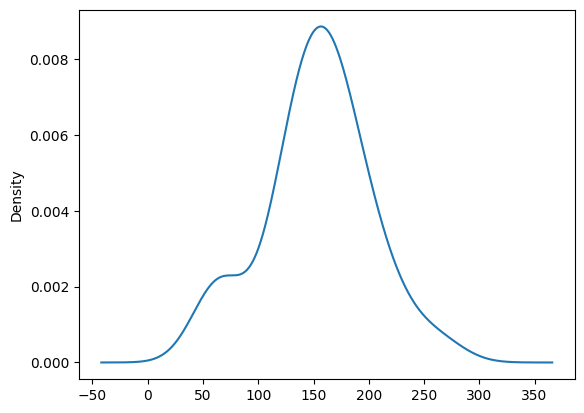

In [ ]:
#Distribution of total runs scored by both teams
grp=combined_data_bat.groupby(by=['Team','Date'])
desc=grp['Runs'].sum().reset_index()
desc=desc[desc['Runs'].apply(lambda x: x>49)]


desc.query('Date>\'01-01-2023\'')['Runs'].plot(kind='kde')


Head to head (Overall)

In [ ]:
#Irrespective of the stadium
import requests
from bs4 import BeautifulSoup

URL="https://www.crictracker.com/csk-vs-rcb-head-to-head-record-in-ipl-history/"

page=requests.get(URL)
soup=BeautifulSoup(page.content,'html.parser')
textt=[]

for m in soup.find_all("div",{"class":"table-responsive"}):
    textt.append(m.text)

req=textt[0].split('\n')
req=list(filter(None,req))
total=int(req[5])-2
csk=int(req[6])-1
rcb=int(req[7])-1
print("Total Matches :",total)
print("CSK WON :",csk)
print("RCB WON :",rcb)



Total Matches : 31
CSK WON : 20
RCB WON : 10


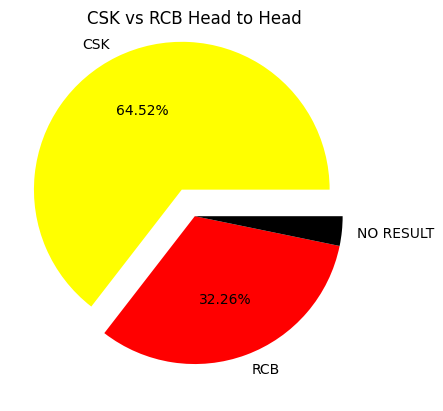

In [ ]:
plt.pie([csk,rcb,1],labels=['CSK','RCB','NO RESULT'],colors=['yellow','red','black'],autopct="%1.2f%%",explode=[0.2,0,0])
plt.title('CSK vs RCB Head to Head')
plt.show()

Teams dependency on batting positions


In [ ]:
combined_csk_bat['Posn'].value_counts()

Posn
5     146
6     130
1     125
4     107
7      78
3      70
2      67
8      31
9       9
10      3
Name: count, dtype: int64

In [ ]:
#Balancing the data
from sklearn.utils import resample
data_majority = combined_csk_bat[combined_csk_bat['Posn'] == 5]
data_minority_1 = combined_csk_bat[combined_csk_bat['Posn'] == 1]
data_minority_2 = combined_csk_bat[combined_csk_bat['Posn'] == 2]
data_minority_3 = combined_csk_bat[combined_csk_bat['Posn'] == 3]
data_minority_4 = combined_csk_bat[combined_csk_bat['Posn'] == 4]
data_minority_6 = combined_csk_bat[combined_csk_bat['Posn'] == 6]
data_minority_7 = combined_csk_bat[combined_csk_bat['Posn'] == 7]
data_minority_8 = combined_csk_bat[combined_csk_bat['Posn'] == 8]
data_minority_9 = combined_csk_bat[combined_csk_bat['Posn'] == 9]
data_minority_10 = combined_csk_bat[combined_csk_bat['Posn'] == 10]

data_minority_1_upsampled = resample(data_minority_1,replace=True,n_samples=len(data_majority),random_state=42)
data_minority_2_upsampled = resample(data_minority_2,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_3_upsampled = resample(data_minority_3,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_4_upsampled = resample(data_minority_4,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_6_upsampled = resample(data_minority_6,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_7_upsampled = resample(data_minority_7,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_8_upsampled = resample(data_minority_8,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_9_upsampled = resample(data_minority_9,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_10_upsampled = resample(data_minority_10,replace=True,n_samples=len(data_majority), random_state=42)

data_balanced = pd.concat([data_majority,data_minority_1_upsampled,data_minority_2_upsampled,data_minority_3_upsampled,data_minority_4_upsampled,data_minority_6_upsampled,data_minority_7_upsampled,data_minority_8_upsampled,data_minority_9_upsampled,data_minority_10_upsampled])
#print(data_balanced)

print(data_balanced['Posn'].value_counts())

Posn
5     146
1     146
2     146
3     146
4     146
6     146
7     146
8     146
9     146
10    146
Name: count, dtype: int64


<Axes: title={'center': 'CSK'}, xlabel='Posn'>

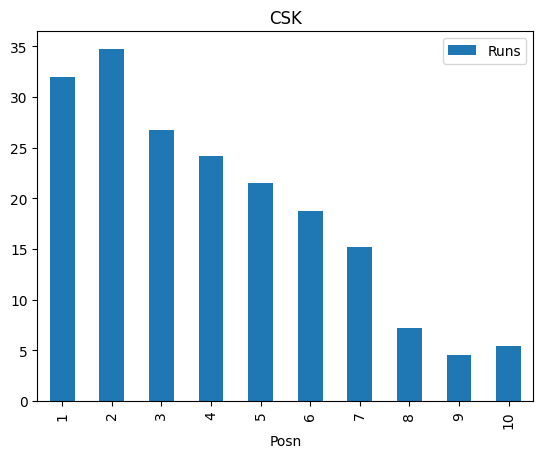

In [ ]:
#CSK
grp=data_balanced.groupby(by=['Posn'])
desc=grp['Runs'].mean().reset_index()
desc.plot(kind='bar',x='Posn',y='Runs',title='CSK')

In [ ]:
combined_rcb_bat['Posn'].value_counts()

Posn
3     176
4     161
2     127
5     126
1      80
6      70
7      48
8      18
9       4
10      1
Name: count, dtype: int64

In [ ]:
#Balancing the data
from sklearn.utils import resample
data_majority = combined_rcb_bat[combined_rcb_bat['Posn'] == 5]
data_minority_1 = combined_rcb_bat[combined_rcb_bat['Posn'] == 1]
data_minority_2 = combined_rcb_bat[combined_rcb_bat['Posn'] == 2]
data_minority_3 = combined_rcb_bat[combined_rcb_bat['Posn'] == 3]
data_minority_4 = combined_rcb_bat[combined_rcb_bat['Posn'] == 4]
data_minority_6 = combined_rcb_bat[combined_rcb_bat['Posn'] == 6]
data_minority_7 = combined_rcb_bat[combined_rcb_bat['Posn'] == 7]
data_minority_8 = combined_rcb_bat[combined_rcb_bat['Posn'] == 8]
data_minority_9 = combined_rcb_bat[combined_rcb_bat['Posn'] == 9]
data_minority_10 = combined_rcb_bat[combined_rcb_bat['Posn'] == 10]

data_minority_1_upsampled = resample(data_minority_1,replace=True,n_samples=len(data_majority),random_state=42)
data_minority_2_upsampled = resample(data_minority_2,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_3_upsampled = resample(data_minority_3,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_4_upsampled = resample(data_minority_4,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_6_upsampled = resample(data_minority_6,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_7_upsampled = resample(data_minority_7,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_8_upsampled = resample(data_minority_8,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_9_upsampled = resample(data_minority_9,replace=True,n_samples=len(data_majority), random_state=42)
data_minority_10_upsampled = resample(data_minority_10,replace=True,n_samples=len(data_majority), random_state=42)

data_balanced = pd.concat([data_majority,data_minority_1_upsampled,data_minority_2_upsampled,data_minority_3_upsampled,data_minority_4_upsampled,data_minority_6_upsampled,data_minority_7_upsampled,data_minority_8_upsampled,data_minority_9_upsampled,data_minority_10_upsampled])
#print(data_balanced)

print(data_balanced['Posn'].value_counts())

Posn
5     126
1     126
2     126
3     126
4     126
6     126
7     126
8     126
9     126
10    126
Name: count, dtype: int64


<Axes: title={'center': 'RCB'}, xlabel='Posn'>

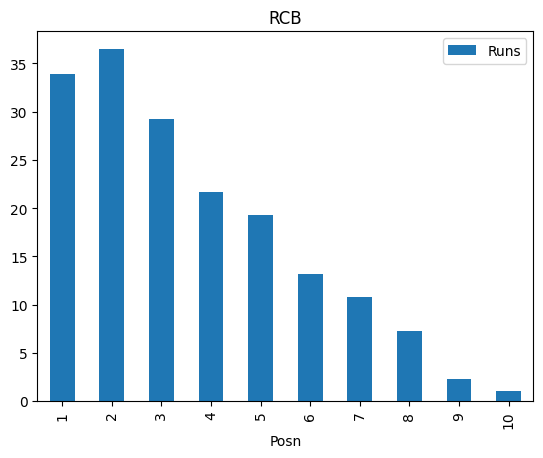

In [ ]:
#RCB
grp=data_balanced.groupby(by=['Posn'])
desc=grp['Runs'].mean().reset_index()
desc.plot(kind='bar',x='Posn',y='Runs',title='RCB')

Based on stadium

In [ ]:
stadium="M Chinnaswamy Stadium"
combined_data1=combined_data_bat[combined_data_bat['Ground']==stadium]
combined_data1.head()
combined_data2=combined_data_bowl[combined_data_bowl['Ground']==stadium]
combined_data2.head()

,Match,Date,M/Inns,Versus,Ground,Overs,S/R,E/R,Avg,Cleaned Batsmen Dismissed,Dismissal Method,Wickets_match,Runs_given,Player,Tag,Team
12,11.0,2018-04-25,1,Royal Challengers Bangalore,M Chinnaswamy Stadium,2.0,24.86,8.59,35.57,NA,NA,0,20,Deepak Chahar,bowl,CSK
28,27.0,2019-04-21,1,Royal Challengers Bangalore,M Chinnaswamy Stadium,4.0,22.04,7.43,27.29,"V Kohli (M S Dhoni), P Negi (A T Rayudu)","caught, caught",2,25,Deepak Chahar,bowl,CSK
85,11.0,2023-04-17,2,Royal Challengers Bangalore,M Chinnaswamy Stadium,4.0,19.85,8.00,26.46,G J Maxwell (M S Dhoni),caught,1,41,Maheesh Theekshana,bowl,CSK
110,1.0,2016-12-04,1,Royal Challengers Bangalore,M Chinnaswamy Stadium,4.0,12.00,6.50,13.00,"A B de Villiers (E J G Morgan), S R Watson (N ...","caught, caught",2,26,Mustafizur Rahman,bowl,CSK
125,16.0,2016-05-29,2,Royal Challengers Bangalore,M Chinnaswamy Stadium,4.0,21.53,6.90,24.76,S R Watson (M C Henriques),caught,1,37,Mustafizur Rahman,bowl,CSK


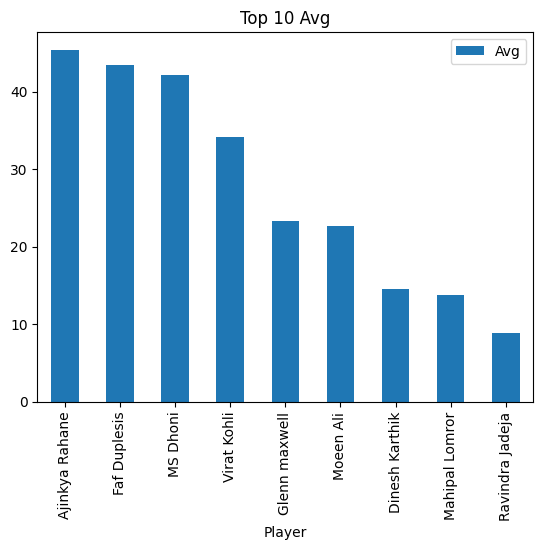

In [ ]:
group=combined_data1.groupby(by=['Player'])
desc=group.agg({'Runs':['mean','count'],'Not out':['sum']}).reset_index()
desc.columns=['Player','Avg','Count','No_notouts']
desc.query('Count >=5').sort_values(by='Avg',ascending=False).head(10).plot(kind='bar',x='Player',y='Avg',title='Top 10 Avg')
desc['Rel_notouts']=desc['No_notouts']/desc['Count']

<Axes: title={'center': 'Top 10 No_notouts'}, xlabel='Player'>

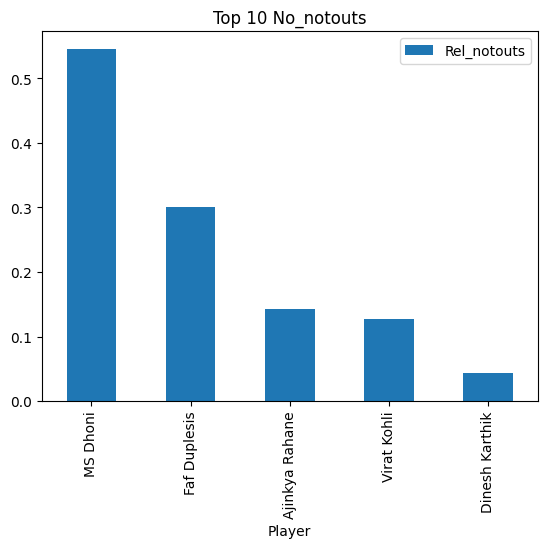

In [ ]:
desc.query('Count>=5 and Player not in @csk_allrounders and Player not in @rcb_allrounders').sort_values(by=['Rel_notouts'],ascending=False).head(10).plot(kind='bar',x='Player',y='Rel_notouts',title='Top 10 No_notouts')

<Axes: xlabel='Player'>

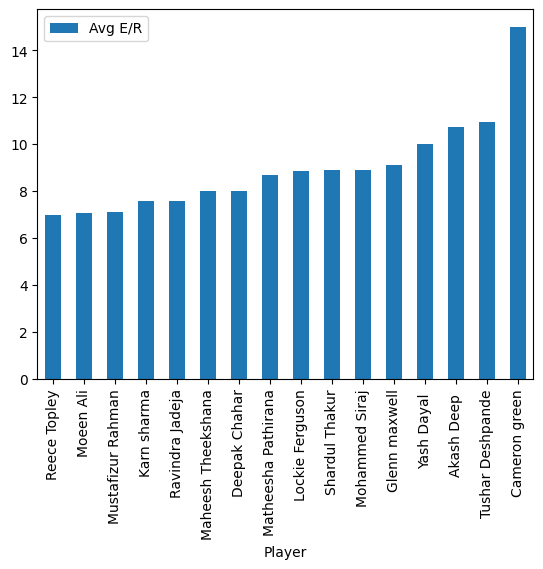

In [ ]:
group=combined_data2.groupby(by=['Player'])
desc=group['E/R'].mean().reset_index()
desc.columns=['Player','Avg E/R']
desc.sort_values(by='Avg E/R').plot(kind='bar',x='Player')

<Axes: xlabel='Player'>

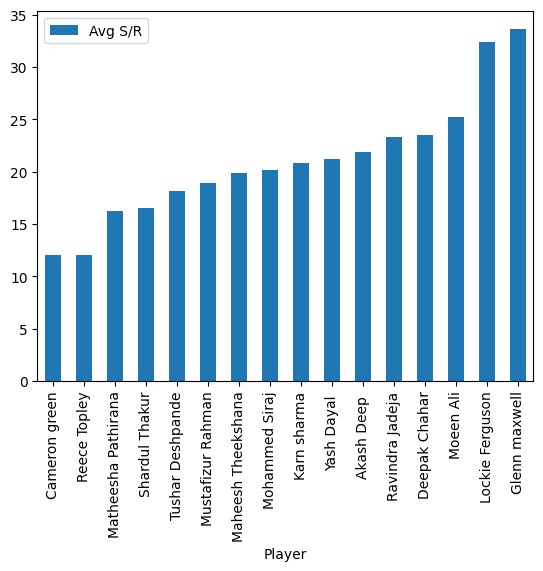

In [ ]:
group=combined_data2.groupby(by=['Player'])
desc=group['S/R'].mean().reset_index()
desc.columns=['Player','Avg S/R']
desc.sort_values(by='Avg S/R').plot(kind='bar',x='Player')

Players to watch out for:

In [ ]:
#Leading run scorers and wicket takers for both teams in previous seasons
date=pd.to_datetime('2023-01-01')
print("Leading run scorer for csk in 2023 season :")
print(combined_csk_bat.query('Date>@date').groupby('Player')['Runs'].sum().reset_index().sort_values(by='Runs',ascending=False).head(1))

print("Leading run scorer for rcb in 2023 season :")
print(combined_rcb_bat.query('Date>@date').groupby('Player')['Runs'].sum().reset_index().sort_values(by='Runs',ascending=False).head(1))

print("Leading wicket taker for csk in 2023 season :")
print(combined_csk_bowl.query('Date>@date').groupby('Player')['Wickets_match'].sum().reset_index().sort_values(by='Wickets_match',ascending=False).head(1))

print("Leading wicket taker for rcb in 2023 season :")
print(combined_rcb_bowl.query('Date>@date').groupby('Player')['Wickets_match'].sum().reset_index().sort_values(by='Wickets_match',ascending=False).head(1))

Leading run scorer for csk in 2023 season :
         Player   Runs
1  Devon Conway  672.0
Leading run scorer for rcb in 2023 season :
         Player   Runs
3  Faf Duplesis  730.0
Leading wicket taker for csk in 2023 season :
             Player  Wickets_match
9  Tushar Deshpande             21
Leading wicket taker for rcb in 2023 season :
           Player  Wickets_match
7  Mohammed Siraj             19


Head to head (vs players)

In [ ]:
def apply_change(x):
    if len(x)==0:
      return ''
    temp=[]
    for i in x:
      temp.append(i.split(' (')[0].strip().strip("'"))
    return temp

In [ ]:
#Bowlers vs batsman
#CSK
player_tags={}
bowl_csk_dismissals={}
bowl_csk_dismissals={'Tushar Deshpande':{},'Ravindra Jadeja':{}}
for i in range(2):
    bowl_csk_dismissals[list(bowl_csk_dismissals.keys())[i]]['Count']=len(csk_bowlers_dict[list(bowl_csk_dismissals.keys())[i]].query('Versus==\'Royal Challengers Bangalore\''))
    lst=[]
    temp=csk_bowlers_dict[list(bowl_csk_dismissals.keys())[i]]
    temp['Cleaned Batsmen Dismissed']=(temp['Cleaned Batsmen Dismissed'].apply(lambda x: apply_change(x.strip("[]").split(','))))
    for j in temp['Cleaned Batsmen Dismissed']:
      lst.extend(j)
    if 'NA' in lst:
      lst.remove('NA')
    for j in range(len(lst)):
      if lst[j] not in list(player_tags.keys()):
        player_tags[lst[j]]=''
      if lst[j] not in list(bowl_csk_dismissals[list(bowl_csk_dismissals.keys())[i]].keys()):
        bowl_csk_dismissals[list(bowl_csk_dismissals.keys())[i]][lst[j]]=1
      else:
        bowl_csk_dismissals[list(bowl_csk_dismissals.keys())[i]][lst[j]]+=1
print(bowl_csk_dismissals)


{'Tushar Deshpande': {'Count': 1, 'B A Stokes': 1, 'S Gopal': 1, 'S M Curran': 1, 'NA': 8, 'M K Pandey': 1, 'Shubman Gill': 1, 'N Pooran': 1, 'A Badoni': 1, 'R G Sharma': 1, 'T H David': 2, 'Y B K Jaiswal': 2, 'J O Holder': 1, 'M K Lomror': 1, 'K D Karthik': 1, 'W D Parnell': 1, 'N Jagadeesan': 1, 'D Wiese': 1, 'S V Samson': 1, 'S Dhawan': 1, 'L S Livingstone': 1, 'J M Sharma': 1, 'C Green': 1, 'P P Shaw': 1, 'Rashid Khan': 1}, 'Ravindra Jadeja': {'Count': 27, 'NA': 102, 'A C Gilchrist': 1, 'R V Uthappa': 3, 'M V Boucher': 1, 'V Kohli': 3, 'R G Sharma': 3, 'A Symonds': 1, 'M A Agarwal': 2, 'G C Smith': 1, 'M S Bisla': 1, 'M K Tiwary': 3, 'S R Watson': 5, 'Y Venugopal Rao': 1, 'M E K Hussey': 2, 'M S Dhoni': 2, 'P A Patel': 2, 'B Chipli': 1, 'M Gony': 1, 'D B Ravi Teja': 1, 'D W Steyn': 1, 'C H Gayle': 1, 'S S Tiwary': 2, 'A T Rayudu': 1, 'J Botha': 1, 'S L Malinga': 1, 'M Vohra': 2, 'A J Finch': 1, 'I K Pathan': 1, 'R Bhatia': 1, 'L R Shukla': 1, 'S P Narine': 2, 'S P D Smith': 5, 'S R

In [ ]:
bowl_rcb_dismissals={}
for i in range(len(rcb_bowlers_list)):
    bowl_rcb_dismissals[rcb_bowlers_list[i]]=dict()
for i in range(len(rcb_bowlers_list)):
    bowl_rcb_dismissals[rcb_bowlers_list[i]]['Count']=len(rcb_bowlers_dict[rcb_bowlers_list[i]].query('Versus==\'Chennai Super Kings\''))
    print(rcb_bowlers_list[i])
    lst=[]
    temp=rcb_bowlers_dict[rcb_bowlers_list[i]].query('Versus==\'Chennai Super Kings\'')
    temp['Cleaned Batsmen Dismissed']=(temp['Cleaned Batsmen Dismissed'].apply(lambda x: apply_change(x.strip("[]").split(','))))
    for j in temp['Cleaned Batsmen Dismissed']:
      lst.extend(j)

    if 'NA' in lst:
      lst.remove('NA')
    for j in range(len(lst)):
      if lst[j] not in list(player_tags.keys()):
        player_tags[lst[j]]=''
      if lst[j] not in list(bowl_rcb_dismissals[rcb_bowlers_list[i]].keys()):
        bowl_rcb_dismissals[rcb_bowlers_list[i]][lst[j]]=1
      else:
        bowl_rcb_dismissals[rcb_bowlers_list[i]][lst[j]]+=1
print(bowl_rcb_dismissals)
print(player_tags)

Akash Deep 
Alzarri Joseph
Lockie Ferguson
Mohammed Siraj
Yash Dayal 
Tom Curran
Reece Topley
Glenn maxwell
Mahipal Lomror
Karn sharma
Cameron green
Swapnil singh
{'Akash Deep ': {'Count': 1}, 'Alzarri Joseph': {'Count': 3, 'M M Ali': 1, 'A T Rayudu': 1, 'S Dube': 1, 'R D Gaikwad': 1, 'R A Jadeja': 1}, 'Lockie Ferguson': {'Count': 4, 'M M Ali': 1, 'NA': 2}, 'Mohammed Siraj': {'Count': 9, 'NA': 6, 'A T Rayudu': 1, 'R D Gaikwad': 1}, 'Yash Dayal ': {'Count': 3, 'R D Gaikwad': 1, 'NA': 1}, 'Tom Curran': {'Count': 4, 'S R Watson': 1, 'S W Billings': 1, 'K M Jadhav': 1, 'A T Rayudu': 1, 'R V Uthappa': 1, 'S N Thakur': 1, 'M M Ali': 1}, 'Reece Topley': {'Count': 0}, 'Glenn maxwell': {'Count': 10, 'S K Raina': 2, 'NA': 4, 'F du Plessis': 1, 'R V Uthappa': 1, 'A T Rayudu': 1, 'R A Jadeja': 1}, 'Mahipal Lomror': {'Count': 0}, 'Karn sharma': {'Count': 6, 'NA': 3, 'B B McCullum': 1, 'D R Smith': 1, 'S K Raina': 1}, 'Cameron green': {'Count': 2, 'NA': 1}, 'Swapnil singh': {'Count': 0}}
{'B A Stoke

<ipython-input-404-3de14cb8ec28>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Cleaned Batsmen Dismissed']=(temp['Cleaned Batsmen Dismissed'].apply(lambda x: apply_change(x.strip("[]").split(','))))
<ipython-input-404-3de14cb8ec28>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Cleaned Batsmen Dismissed']=(temp['Cleaned Batsmen Dismissed'].apply(lambda x: apply_change(x.strip("[]").split(','))))
<ipython-input-404-3de14cb8ec28>:9: SettingWithCopyWarning: 
A value is trying to be set on a co

In [ ]:
#print(player_tags.keys())
#print(csk_batsmen_list)
#print(rcb_batsmen_list)
player_tags['F du Plessis']='Faf Duplesis'
player_tags['V Kohli']='Virat Kohli'
player_tags['Anuj Rawat']='Anuj Rawat'
player_tags['K D Karthik']='Dinesh Karthik'
player_tags['S S Prabhudessai']='Suyash Prabhudessai'
player_tags['G J Maxwell']='Glenn maxwell'
player_tags['M K Lomror']='Mahipal Lomror'
player_tags['C Green']='Cameron green'
player_tags['M M Ali']='Moeen Ali'
player_tags['S Dube']='Shivam Dube'
player_tags['R D Gaikwad']='Ruturaj Gaikwad'
player_tags['M Santner']='Mitchell Santner'
player_tags['R A Jadeja']='Ravindra Jadeja'
player_tags['S N Thakur']='Shardul Thakur'


Individual performance against teams

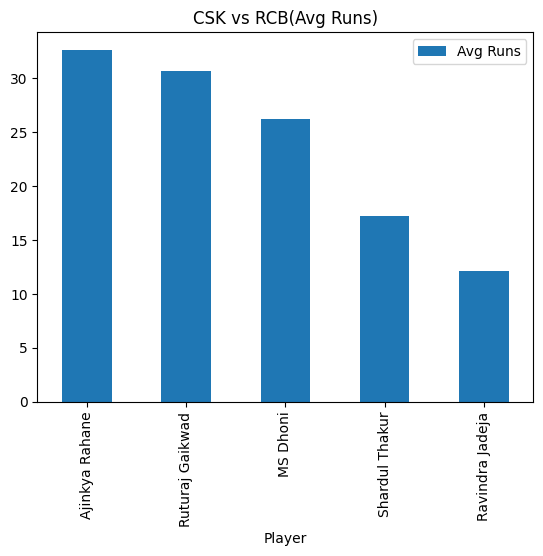

<Axes: title={'center': 'CSK vs RCB(Total Runs)'}, xlabel='Player'>

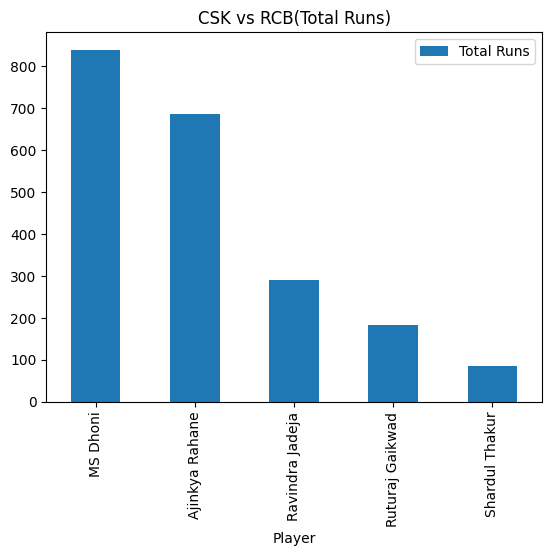

In [ ]:
#CSK BATSMEN
grp=combined_csk_bat.query('Versus==\'Royal Challengers Bangalore\'').groupby(by='Player')
desc=grp.agg({'Runs':['mean','sum','count']}).reset_index()
desc.columns=['Player','Avg Runs','Total Runs','Count']
desc[desc['Count']>=5].sort_values(by='Avg Runs',ascending=False).head(10).plot(kind='bar',x='Player',y='Avg Runs',title='CSK vs RCB(Avg Runs)')
plt.show()
desc[desc['Count']>=5].sort_values(by='Total Runs',ascending=False).head(10).plot(kind='bar',x='Player',y='Total Runs',title='CSK vs RCB(Total Runs)')

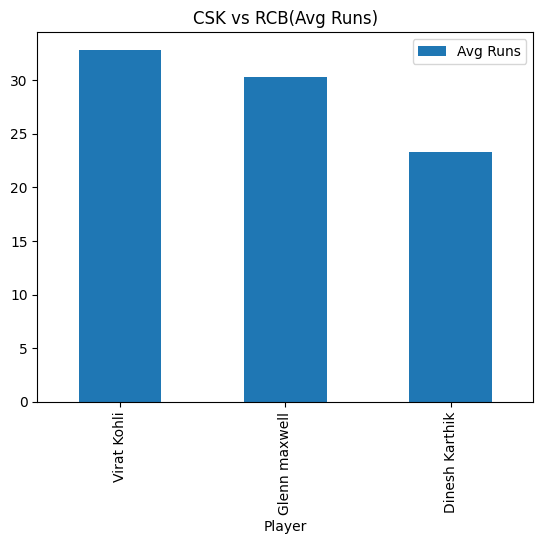

<Axes: title={'center': 'CSK vs RCB(Total Runs)'}, xlabel='Player'>

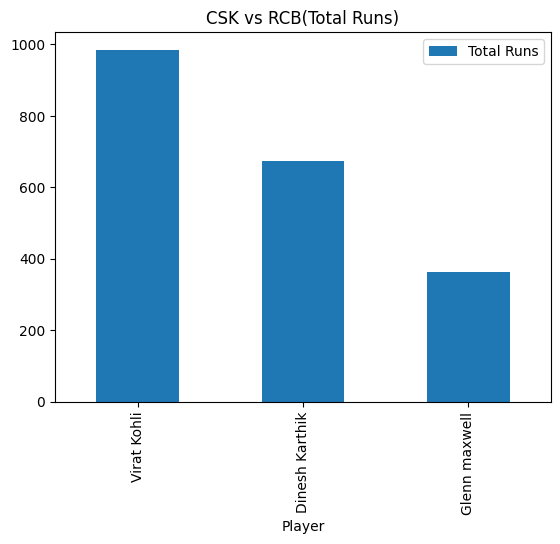

In [ ]:
#RCB BATSMEN
grp=combined_rcb_bat.query('Versus==\'Chennai Super Kings\'').groupby(by='Player')
desc=grp.agg({'Runs':['mean','sum','count']}).reset_index()
desc.columns=['Player','Avg Runs','Total Runs','Count']
desc[desc['Count']>=5].sort_values(by='Avg Runs',ascending=False).head(10).plot(kind='bar',x='Player',y='Avg Runs',title='CSK vs RCB(Avg Runs)')
plt.show()
desc[desc['Count']>=5].sort_values(by='Total Runs',ascending=False).head(10).plot(kind='bar',x='Player',y='Total Runs',title='CSK vs RCB(Total Runs)')

<Axes: xlabel='Player'>

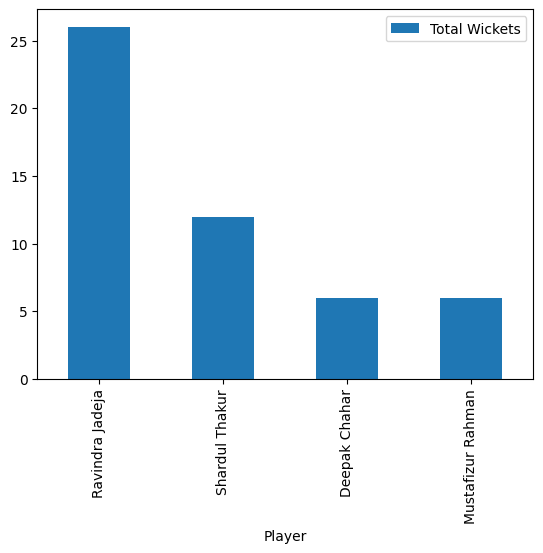

In [ ]:
#CSK Bowlers(Leading Wicket Takers against RCB)
grp=combined_csk_bowl.query('Versus==\'Royal Challengers Bangalore\'').groupby(by='Player')
desc=grp.agg({'Wickets_match':['sum','count']}).reset_index()
desc.columns=['Player','Total Wickets','Count']
desc[desc['Count']>=5].sort_values(by='Total Wickets',ascending=False).plot(kind='bar',x='Player',y='Total Wickets')

<Axes: xlabel='Player'>

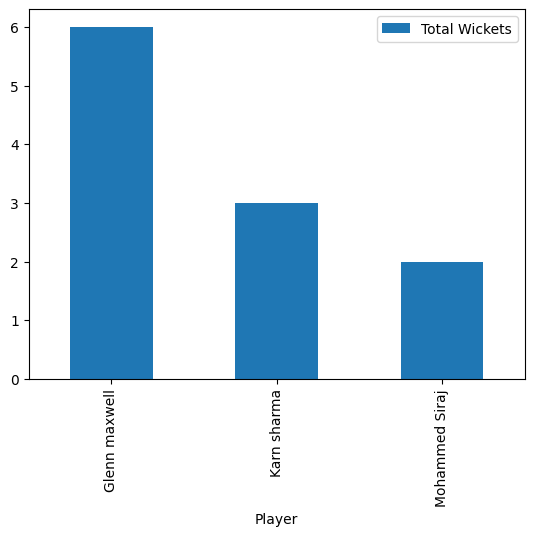

In [ ]:
#RCB Bowlers(Leading Wicket Takers against CSK)
grp=combined_rcb_bowl.query('Versus==\'Chennai Super Kings\'').groupby(by='Player')
desc=grp.agg({'Wickets_match':['sum','count']}).reset_index()
desc.columns=['Player','Total Wickets','Count']
desc[desc['Count']>=5].sort_values(by='Total Wickets',ascending=False).plot(kind='bar',x='Player',y='Total Wickets')

#We can infer another thing with this i.e RCB change players frequently for every match than CSK

Fantasy points calculation

Possible playing eleven including impact player

RCB

Virat,Faf,Rajat,Cameron Green,Dinesh,Glen,Mahipal,Yash,Karn,Siraj,Ferguson,Swapnil

CSK

Ruturaj,Moenn,Daryll,Rahane,Dube,Jadeja,Santner,Dhoni,Thakur,Deshpande,Simarjeet,Maheesh Theekshana

PLAN :

For each player we will train a model to predict their performance and use that performance to calculate the fantasy points

BATTERS :

We will train a model with factors like innings,position,ground,opponent to predict the runs scored.

BOWLERS :

For bowlers we will train two models one for wickets taken and one for runs given.

For these the factors will be the innings and number of overs bowled.

In [ ]:
prob_11_csk=['MS Dhoni', 'Ruturaj Gaikwad', 'Ajinkya Rahane', 'Ravindra Jadeja', 'Mitchell Santner', 'Moeen Ali', 'Shivam Dube', 'Shardul Thakur', 'Daryl Mitchell','Maheesh Theekshana','Simarjeet Singh','Tushar Deshpande']
prob_11_rcb=['Faf Duplesis', 'Rajat Patidar', 'Virat Kohli','Dinesh Karthik','Glenn maxwell', 'Mahipal Lomror', 'Karn sharma', 'Cameron green', 'Swapnil singh','Lockie Ferguson', 'Mohammed Siraj', 'Yash Dayal ']

In [ ]:
#Preprocessing  batting data for the model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Encoder=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['Versus','Ground'])],remainder='passthrough')
encoded_data_bat=Encoder.fit_transform(combined_data_bat[['M/Inns','B/F','Posn','Versus','Ground']])
"""
print(encoded_data_bat.shape)
print(type(encoded_data_bat))
print(len(list(Encoder.get_feature_names_out())))"""
encoded_data_bat=pd.DataFrame(encoded_data_bat.toarray(),columns=list(Encoder.get_feature_names_out()))
encoded_data_bat['Player']=combined_data_bat['Player']
encoded_data_bat['Runs']=combined_data_bat['Runs']
encoded_data_bat.head()

,encoder__Versus_Chennai Super Kings,encoder__Versus_Deccan Chargers,encoder__Versus_Delhi Capitals,encoder__Versus_Gujarat Lions,encoder__Versus_Gujarat Titans,encoder__Versus_Kochi Tuskers Kerala,encoder__Versus_Kolkata Knight Riders,encoder__Versus_Lucknow Super Giants,encoder__Versus_Mumbai Indians,encoder__Versus_Pune Warriors,...,encoder__Ground_St George's Park,encoder__Ground_SuperSport Park,encoder__Ground_Vidarbha Cricket Association Stadium,encoder__Ground_Wanderers Stadium,encoder__Ground_Wankhede Stadium,remainder__M/Inns,remainder__B/F,remainder__Posn,Player,Runs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,MS Dhoni,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,16.0,5.0,MS Dhoni,30.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,27.0,3.0,MS Dhoni,43.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,30.0,5.0,MS Dhoni,65.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,27.0,4.0,MS Dhoni,32.0


In [ ]:
#CSK batting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

csk_batsmen_regressors={}
for i in csk_batsmen_list:
    if i not in prob_11_csk:
      continue
    print(i)
    X=encoded_data_bat.query('Player==@i').iloc[:,:-2].values
    y=encoded_data_bat.query('Player==@i').iloc[:,-1].values
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
    csk_batsmen_regressors[i]=LinearRegression()
    csk_batsmen_regressors[i].fit(X_train,y_train)
    y_pred=np.round(np.maximum(csk_batsmen_regressors[i].predict(X_test),0))
    print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
    print(r2_score(y_test,y_pred))

MS Dhoni
[[44. 53.]
 [ 0.  5.]
 [30. 31.]
 [45. 28.]
 [10. 16.]
 [22. 20.]
 [ 3.  0.]
 [25. 21.]
 [29. 12.]
 [ 0.  5.]
 [13. 14.]
 [26. 14.]
 [ 8. 13.]
 [46. 43.]
 [11. 14.]
 [ 7.  3.]
 [48. 47.]
 [40. 22.]
 [28. 17.]
 [17. 23.]
 [ 4. 18.]
 [ 2.  5.]]
0.5983958625525947
Ruturaj Gaikwad
[[44. 47.]
 [10.  3.]
 [25. 24.]
 [17.  4.]
 [ 0.  1.]
 [43. 28.]]
0.7308566347198893
Ajinkya Rahane
[[ 59.  60.]
 [ 26.  21.]
 [ 84. 105.]
 [  8.  12.]
 [  0.   2.]
 [ 65.  61.]
 [ 26.  28.]
 [  2.  13.]
 [  0.   4.]
 [ 49.  44.]
 [ 21.  19.]
 [ 69.  64.]
 [ 12.   8.]
 [ 74.  62.]
 [ 84.  84.]
 [  6.   6.]]
0.9439908936243131
Ravindra Jadeja
[[18.  3.]
 [ 0.  4.]
 [13. 11.]
 [ 3.  7.]
 [ 0.  0.]
 [ 8.  7.]
 [16.  9.]
 [14. 33.]
 [ 5.  3.]
 [19. 20.]
 [28. 10.]
 [ 3.  0.]
 [19. 14.]
 [35. 44.]
 [24. 23.]
 [ 1. 11.]
 [12. 19.]
 [19. 20.]]
0.45366998850134155
Mitchell Santner
[[11. 22.]]
nan
Moeen Ali
[[31. 26.]
 [94. 93.]
 [20. 23.]
 [31. 26.]
 [13. 19.]
 [ 0. 13.]]
0.9396813353566009
Shivam Dube
[[24. 19

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
#CSK batting
csk_batsmen_regressors={}
for i in csk_batsmen_list:
    if i not in prob_11_csk:
      continue
    print(i)
    X=encoded_data_bat.query('Player==@i').iloc[:,:-2].values
    y=encoded_data_bat.query('Player==@i').iloc[:,-1].values
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
    csk_batsmen_regressors[i]=RandomForestRegressor(n_estimators=10)
    csk_batsmen_regressors[i].fit(X_train,y_train)
    y_pred=np.round(np.maximum(csk_batsmen_regressors[i].predict(X_test),0))
    print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
    print(r2_score(y_test,y_pred))

MS Dhoni
[[32. 53.]
 [ 4.  5.]
 [22. 31.]
 [30. 28.]
 [18. 16.]
 [14. 20.]
 [ 2.  0.]
 [27. 21.]
 [ 2. 12.]
 [ 4.  5.]
 [14. 14.]
 [27. 14.]
 [ 2. 13.]
 [47. 43.]
 [11. 14.]
 [ 2.  3.]
 [54. 47.]
 [25. 22.]
 [36. 17.]
 [18. 23.]
 [ 7. 18.]
 [ 2.  5.]]
0.6147878681626928
Ruturaj Gaikwad
[[39. 47.]
 [ 4.  3.]
 [15. 24.]
 [ 0.  4.]
 [ 1.  1.]
 [36. 28.]]
0.8660211441557158
Ajinkya Rahane
[[ 61.  60.]
 [ 29.  21.]
 [ 95. 105.]
 [ 10.  12.]
 [  2.   2.]
 [ 63.  61.]
 [ 20.  28.]
 [  2.  13.]
 [  1.   4.]
 [ 44.  44.]
 [ 23.  19.]
 [ 64.  64.]
 [  8.   8.]
 [ 77.  62.]
 [ 96.  84.]
 [  3.   6.]]
0.9503229254639887
Ravindra Jadeja
[[13.  3.]
 [10.  4.]
 [14. 11.]
 [ 3.  7.]
 [ 1.  0.]
 [ 7.  7.]
 [14.  9.]
 [17. 33.]
 [ 4.  3.]
 [14. 20.]
 [21. 10.]
 [ 1.  0.]
 [17. 14.]
 [34. 44.]
 [25. 23.]
 [15. 11.]
 [12. 19.]
 [20. 20.]]
0.6636642391720966
Mitchell Santner
[[ 7. 22.]]
nan
Moeen Ali
[[31. 26.]
 [51. 93.]
 [17. 23.]
 [20. 26.]
 [ 8. 19.]
 [ 4. 13.]]
0.5304248861911988
Shivam Dube
[[24. 19.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
#CSK batting
import xgboost as xgb
csk_batsmen_regressors={}
for i in csk_batsmen_list:
    if i not in prob_11_csk:
      continue
    print(i)
    X=encoded_data_bat.query('Player==@i').iloc[:,:-2].values
    y=encoded_data_bat.query('Player==@i').iloc[:,-1].values
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
    csk_batsmen_regressors[i]=xgb.XGBRegressor()
    csk_batsmen_regressors[i].fit(X_train,y_train)
    y_pred=np.round(np.maximum(csk_batsmen_regressors[i].predict(X_test),0))
    print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
    print(r2_score(y_test,y_pred))

MS Dhoni
[[41. 53.]
 [10.  5.]
 [29. 31.]
 [44. 28.]
 [14. 16.]
 [15. 20.]
 [ 2.  0.]
 [26. 21.]
 [10. 12.]
 [10.  5.]
 [19. 14.]
 [28. 14.]
 [ 2. 13.]
 [54. 43.]
 [12. 14.]
 [ 8.  3.]
 [63. 47.]
 [33. 22.]
 [35. 17.]
 [19. 23.]
 [ 5. 18.]
 [ 3.  5.]]
0.5424701963534362
Ruturaj Gaikwad
[[34. 47.]
 [ 3.  3.]
 [21. 24.]
 [ 0.  4.]
 [ 0.  1.]
 [35. 28.]]
0.8553502618318348
Ajinkya Rahane
[[ 64.  60.]
 [ 32.  21.]
 [ 97. 105.]
 [  9.  12.]
 [  3.   2.]
 [ 59.  61.]
 [ 17.  28.]
 [  2.  13.]
 [  2.   4.]
 [ 41.  44.]
 [ 18.  19.]
 [ 67.  64.]
 [  7.   8.]
 [ 78.  62.]
 [ 96.  84.]
 [  2.   6.]]
0.9414450251526909
Ravindra Jadeja
[[17.  3.]
 [11.  4.]
 [16. 11.]
 [ 1.  7.]
 [ 1.  0.]
 [ 9.  7.]
 [17.  9.]
 [11. 33.]
 [ 2.  3.]
 [16. 20.]
 [15. 10.]
 [ 1.  0.]
 [17. 14.]
 [34. 44.]
 [27. 23.]
 [15. 11.]
 [14. 19.]
 [19. 20.]]
0.5390475277884248
Mitchell Santner
[[11. 22.]]
nan
Moeen Ali
[[36. 26.]
 [58. 93.]
 [18. 23.]
 [21. 26.]
 [ 7. 19.]
 [ 8. 13.]]
0.6485584218512899
Shivam Dube
[[23. 19.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
#RCB batting
rcb_batsmen_regressors={}
for i in rcb_batsmen_list:
    if i not in prob_11_rcb:
      continue
    print(i)
    X=encoded_data_bat.query('Player==@i').iloc[:,:-2].values
    y=encoded_data_bat.query('Player==@i').iloc[:,-1].values
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
    rcb_batsmen_regressors[i]=LinearRegression()
    rcb_batsmen_regressors[i].fit(X_train,y_train)
    y_pred=np.round(np.maximum(rcb_batsmen_regressors[i].predict(X_test),0))
    print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
    print(r2_score(y_test,y_pred))

Faf Duplesis
[[58. 38.]
 [ 0.  8.]
 [36. 33.]
 [ 5. 10.]
 [33. 43.]
 [61. 69.]
 [59. 50.]
 [11.  5.]
 [21. 24.]
 [22. 24.]
 [62. 43.]
 [49. 48.]
 [12.  9.]]
0.7505856346299778
Rajat Patidar
[[55. 52.]
 [ 6.  8.]]
0.9865702479338843
Virat Kohli
[[22. 21.]
 [ 0.  3.]
 [12. 10.]
 [54. 53.]
 [ 0.  2.]
 [42. 39.]
 [ 0.  2.]
 [26. 25.]
 [ 3.  4.]
 [72. 75.]
 [27. 25.]
 [38. 15.]
 [56. 67.]
 [43. 43.]
 [56. 54.]
 [18. 20.]
 [19. 18.]
 [24. 34.]
 [70. 55.]
 [32. 33.]
 [42. 32.]
 [10.  8.]
 [ 5.  1.]]
0.8911966885948702
Dinesh Karthik
[[40. 40.]
 [54. 52.]
 [16.  7.]
 [35. 40.]
 [31. 44.]
 [39. 51.]
 [18.  4.]
 [11.  9.]
 [33. 30.]
 [25. 45.]
 [23. 23.]
 [22. 20.]
 [ 2.  0.]
 [ 9. 12.]
 [ 6.  2.]
 [ 3.  0.]
 [12. 21.]
 [37. 31.]
 [52. 66.]
 [44. 30.]
 [13. 10.]
 [16.  9.]
 [ 4.  0.]]
0.8042859783903702
Glenn maxwell
[[41. 43.]
 [23. 10.]
 [ 5.  0.]
 [10.  0.]
 [13. 12.]
 [ 5.  2.]
 [16.  7.]
 [48. 45.]
 [13. 16.]
 [ 9.  5.]
 [13.  6.]
 [11.  6.]]
0.8087480759363777
Mahipal Lomror
[[60. 29.]
 [ 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
#RCB Batting
for i in rcb_batsmen_list:
    if i not in prob_11_rcb:
      continue
    print(i)
    X=encoded_data_bat.query('Player==@i').iloc[:,:-2].values
    y=encoded_data_bat.query('Player==@i').iloc[:,-1].values
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
    rcb_batsmen_regressors[i]=RandomForestRegressor()
    rcb_batsmen_regressors[i].fit(X_train,y_train)
    y_pred=np.round(np.maximum(rcb_batsmen_regressors[i].predict(X_test),0))
    print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))
    print(r2_score(y_test,y_pred))

Faf Duplesis
[[59. 38.]
 [ 3.  8.]
 [43. 33.]
 [ 6. 10.]
 [43. 43.]
 [59. 69.]
 [48. 50.]
 [ 4.  5.]
 [29. 24.]
 [21. 24.]
 [62. 43.]
 [42. 48.]
 [ 9.  9.]]
0.760236233462008
Rajat Patidar
[[34. 52.]
 [13.  8.]]
0.6394628099173554
Virat Kohli
[[18. 21.]
 [ 0.  3.]
 [20. 10.]
 [51. 53.]
 [ 2.  2.]
 [33. 39.]
 [ 2.  2.]
 [25. 25.]
 [ 6.  4.]
 [73. 75.]
 [26. 25.]
 [20. 15.]
 [49. 67.]
 [42. 43.]
 [44. 54.]
 [19. 20.]
 [15. 18.]
 [26. 34.]
 [59. 55.]
 [38. 33.]
 [36. 32.]
 [ 9.  8.]
 [ 2.  1.]]
0.929164510803952
Dinesh Karthik
[[37. 40.]
 [57. 52.]
 [11.  7.]
 [29. 40.]
 [35. 44.]
 [37. 51.]
 [21.  4.]
 [11.  9.]
 [28. 30.]
 [22. 45.]
 [21. 23.]
 [21. 20.]
 [ 2.  0.]
 [15. 12.]
 [ 9.  2.]
 [ 1.  0.]
 [16. 21.]
 [39. 31.]
 [50. 66.]
 [43. 30.]
 [17. 10.]
 [17.  9.]
 [ 0.  0.]]
0.7674345754077483
Glenn maxwell
[[42. 43.]
 [16. 10.]
 [ 3.  0.]
 [ 4.  0.]
 [11. 12.]
 [ 4.  2.]
 [14.  7.]
 [38. 45.]
 [17. 16.]
 [ 5.  5.]
 [ 8.  6.]
 [10.  6.]]
0.9284248332478194
Mahipal Lomror
[[44. 29.]
 [ 4.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Predicting batsmen performance in next CSK VS RCB match in Chinnaswamy stadium

In [ ]:
#CSK batting
ground='M Chinnaswamy Stadium'
ver='Royal Challengers Bangalore'
innings=2
csk_predicted_runs={}
for i in csk_batsmen_list:
    if i not in prob_11_csk:
      continue
    b_f=combined_data_bat.query('Player==@i')['B/F'].mean()
    posn=combined_data_bat.query('Player==@i')['Posn'].value_counts().idxmax()
    row=[innings,b_f,posn,ver,ground]
    row=pd.DataFrame([row])
    row.columns=['M/Inns','B/F','Posn','Versus','Ground']
    csk_predicted_runs[i]=np.round(csk_batsmen_regressors[i].predict(Encoder.transform(row)))[0]
print(csk_predicted_runs)
print(sum(list(csk_predicted_runs.values())))

{'MS Dhoni': 24.0, 'Ruturaj Gaikwad': 38.0, 'Ajinkya Rahane': 31.0, 'Ravindra Jadeja': 25.0, 'Mitchell Santner': 10.0, 'Moeen Ali': 7.0, 'Shivam Dube': 19.0, 'Shardul Thakur': 13.0, 'Daryl Mitchell': 16.0}
183.0


In [ ]:
#RCB batting
ground='M Chinnaswamy Stadium'
ver='Chennai Super Kings'
innings=1
rcb_predicted_runs={}
for i in rcb_batsmen_list:
    if i not in prob_11_rcb:
      continue
    b_f=combined_data_bat.query('Player==@i')['B/F'].mean()
    posn=combined_data_bat.query('Player==@i')['Posn'].value_counts().idxmax()
    row=[innings,b_f,posn,ver,ground]
    row=pd.DataFrame([row])
    row.columns=['M/Inns','B/F','Posn','Versus','Ground']
    rcb_predicted_runs[i]=np.round(rcb_batsmen_regressors[i].predict(Encoder.transform(row)))[0]
print(rcb_predicted_runs)
print(sum(list(rcb_predicted_runs.values())))


{'Faf Duplesis': 37.0, 'Rajat Patidar': 27.0, 'Virat Kohli': 28.0, 'Dinesh Karthik': 19.0, 'Glenn maxwell': 19.0, 'Mahipal Lomror': 10.0, 'Karn sharma': 10.0, 'Cameron green': 29.0, 'Swapnil singh': 4.0}
183.0


In [ ]:
#Preprocessing bowling data
#Factors-Innings,Overs,Ground,Versus
#Dependent-Runs/Wickets
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(combined_data_bowl['Wickets_match'])
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(handle_unknown='ignore'),['Versus','Ground'])],remainder='passthrough')
encoded_data_bowl=ct.fit_transform(combined_data_bowl[['M/Inns','Overs','Versus','Ground']])
encoded_data_bowl=pd.DataFrame(encoded_data_bowl.toarray(),columns=list(ct.get_feature_names_out()))
encoded_data_bowl[['Player','Runs']]=combined_data_bowl[['Player','Runs_given']]
encoded_data_bowl['Wickets']=le.transform(combined_data_bowl['Wickets_match'])
encoded_data_bowl.head()

,encoder__Versus_Chennai Super Kings,encoder__Versus_Deccan Chargers,encoder__Versus_Delhi Capitals,encoder__Versus_Gujarat Lions,encoder__Versus_Gujarat Titans,encoder__Versus_Kolkata Knight Riders,encoder__Versus_Lucknow Super Giants,encoder__Versus_Mumbai Indians,encoder__Versus_Pune Warriors,encoder__Versus_Punjab Kings,...,encoder__Ground_Sharjah Cricket Stadium,encoder__Ground_Sheikh Zayed Stadium,encoder__Ground_St George's Park,encoder__Ground_SuperSport Park,encoder__Ground_Wankhede Stadium,remainder__M/Inns,remainder__Overs,Player,Runs,Wickets
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,4.0,Rajvardhan Hangargekar,36,3
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,Rajvardhan Hangargekar,24,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,Deepak Chahar,13,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Deepak Chahar,28,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,Deepak Chahar,21,0


In [ ]:
# balancing data
from imblearn.over_sampling import RandomOverSampler
def balance_data(data):
    #print(data)
    X = data.iloc[:,:-3]
    y = data.iloc[:,-1]
    ros = RandomOverSampler(random_state=42)
    X_res, y_res = ros.fit_resample(X, y)
    balanced_data = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['Wickets'])], axis=1)
    return balanced_data

In [ ]:
#RCB Bowling(Wickets)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
rcb_bowlers_regressors_w={}
for i in rcb_bowlers_list:
    if i not in prob_11_rcb:
      continue
    print(i)
    temp=balance_data(encoded_data_bowl.query('Player==@i'))
    #print(temp.columns)
    X=temp.iloc[:,:-1].values
    #print(len(X[0]))
    y=temp.iloc[:,-1].values
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)
    rcb_bowlers_regressors_w[i]=RandomForestClassifier(n_estimators=10)
    rcb_bowlers_regressors_w[i].fit(X_train,y_train)
    y_pred=np.round(np.maximum(rcb_bowlers_regressors_w[i].predict(X_test),0))
    print(np.concatenate((le.inverse_transform(y_pred).reshape(len(y_pred),1),le.inverse_transform(y_test).reshape(len(y_test),1)),1))
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))

Lockie Ferguson
[[3 3]
 [3 3]
 [0 0]
 [4 4]
 [1 1]
 [3 3]
 [4 4]
 [3 3]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 4 0]
 [0 0 0 2]]
1.0
Mohammed Siraj
[[3 3]
 [3 3]
 [4 4]
 [2 0]
 [0 1]
 [2 2]
 [3 3]
 [0 1]
 [1 1]
 [1 1]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [3 3]
 [0 0]]
[[1 0 1 0 0]
 [2 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 3]]
0.8125
Yash Dayal 
[[1 0]
 [0 0]
 [3 3]]
[[1 1 0]
 [0 0 0]
 [0 0 1]]
0.6666666666666666
Glenn maxwell
[[1 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [2 2]
 [0 0]
 [1 0]
 [2 2]
 [1 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]
[[2 4 0]
 [1 3 0]
 [0 0 5]]
0.6666666666666666
Mahipal Lomror
[[0 0]
 [0 0]]
[[2]]
1.0
Karn sharma
[[2 0]
 [1 1]
 [0 0]
 [2 1]
 [3 3]
 [0 0]
 [4 4]
 [4 4]
 [4 4]
 [1 0]
 [3 3]
 [1 1]
 [2 2]
 [2 2]]
[[2 1 1 0 0]
 [0 2 1 0 0]
 [0 0 2 0 0]
 [0 0 0 2 0]
 [0 0 0 0 3]]
0.7857142857142857
Cameron green
[[0 0]
 [1 1]
 [2 2]
 [1 1]]
[[1 0 0]
 [0 2 0]
 [0 0 1]]
1.0
Swapnil singh
[[0 0]
 [1 1]]
[[1 0]
 [0 1]]
1.0


In [ ]:
#CSK Bowling(Wickets)
csk_bowlers_regressors_w={}
for i in csk_bowlers_list:
    if i not in prob_11_csk or i in ['Daryl Mitchell']:
      continue
    print(i)
    temp=balance_data(encoded_data_bowl.query('Player==@i'))
    X=temp.iloc[:,:-1].values
    #print(len(X[0]))
    #print()
    y=temp.iloc[:,-1].values
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)
    csk_bowlers_regressors_w[i]=RandomForestClassifier(n_estimators=10)
    csk_bowlers_regressors_w[i].fit(X_train,y_train)
    y_pred=np.round(np.maximum(csk_bowlers_regressors_w[i].predict(X_test),0))
    print(np.concatenate((le.inverse_transform(y_pred).reshape(len(y_pred),1),le.inverse_transform(y_test).reshape(len(y_test),1)),1))
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))

Maheesh Theekshana
[[3 3]
 [4 4]
 [2 2]
 [0 1]
 [1 1]]
[[0 0 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]
0.8
Simarjeet Singh
[[2 2]]
[[1]]
1.0
Tushar Deshpande
[[3 3]
 [1 1]
 [0 0]
 [3 3]]
[[1 0 0]
 [0 1 0]
 [0 0 2]]
1.0
Ravindra Jadeja
[[4 4]
 [4 4]
 [2 1]
 [4 4]
 [3 3]
 [4 4]
 [3 3]
 [3 3]
 [4 4]
 [3 0]
 [0 0]
 [3 3]
 [5 5]
 [1 1]
 [4 4]
 [4 4]
 [5 5]
 [1 0]
 [1 2]
 [3 1]
 [2 2]
 [0 0]
 [4 4]
 [5 5]
 [4 4]
 [1 1]
 [4 4]
 [4 4]
 [4 4]
 [3 3]
 [4 4]
 [0 0]
 [5 5]
 [1 1]
 [3 3]
 [3 3]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [5 5]
 [1 1]
 [1 1]
 [1 0]
 [5 5]
 [0 0]
 [2 0]
 [3 3]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 0]
 [4 4]
 [2 2]
 [3 3]
 [5 5]
 [3 3]]
[[ 7  3  1  1  0  0]
 [ 1  9  1  1  0  0]
 [ 0  1  5  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0  7]]
0.8548387096774194
Mitchell Santner
[[1 1]
 [2 2]
 [2 2]]
[[1 0]
 [0 2]]
1.0
Moeen Ali
[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [2 2]
 [3 3]
 [1 1]
 [3 3]
 [0 0]
 [4 4]
 [1 1]
 [2 2]
 [3 3]]
[[3 1 

Predicting Performance of bowlers

In [ ]:
ver='Royal Challengers Bangalore'
ground='M Chinnaswamy Stadium'
innings=1
csk_predicted_wickets={}
for i in csk_bowlers_list:
    if i not in prob_11_csk or i in ['Daryl Mitchell']:
        continue
    #print(f"Predicting wickets for {i}")
    overs = combined_data_bowl.query('Player == @i')['Overs'].mean()
    row = pd.DataFrame([[ver, ground, innings, overs]], columns=['Versus', 'Ground', 'M/Inns', 'Overs'])
    row_encoded = ct.transform(row).toarray()
    #row_encoded = pd.DataFrame(row_encoded.toarray(), columns=ct.get_feature_names_out())
    csk_predicted_wickets[i] = np.round(le.inverse_transform(csk_bowlers_regressors_w[i].predict(row_encoded)))[0]

print(csk_predicted_wickets)

{'Maheesh Theekshana': 3, 'Simarjeet Singh': 0, 'Tushar Deshpande': 3, 'Ravindra Jadeja': 0, 'Mitchell Santner': 0, 'Moeen Ali': 1, 'Shivam Dube': 0, 'Shardul Thakur': 2}


In [ ]:
ver='Chennai Super Kings'
ground='M Chinnaswamy Stadium'
innings=2
rcb_predicted_wickets={}
for i in rcb_bowlers_list:
    if i not in prob_11_rcb:
        continue
    #print(f"Predicting wickets for {i}")
    overs = combined_data_bowl.query('Player == @i')['Overs'].mean()
    row = pd.DataFrame([[ver, ground, innings, overs]], columns=['Versus', 'Ground', 'M/Inns', 'Overs'])
    row_encoded = ct.transform(row).toarray()
    #row_encoded = pd.DataFrame(row_encoded.toarray(), columns=ct.get_feature_names_out())
    rcb_predicted_wickets[i] = np.round(le.inverse_transform(rcb_bowlers_regressors_w[i].predict(row_encoded)))[0]

print(rcb_predicted_wickets)

{'Lockie Ferguson': 0, 'Mohammed Siraj': 0, 'Yash Dayal ': 0, 'Glenn maxwell': 1, 'Mahipal Lomror': 0, 'Karn sharma': 1, 'Cameron green': 0, 'Swapnil singh': 0}
